Missing values:
Date              0
Instagram_Time    0
Weather           0
Temperature       0
Humidity          0



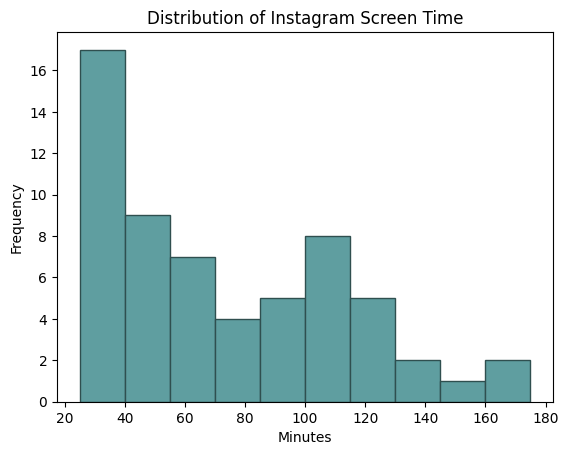

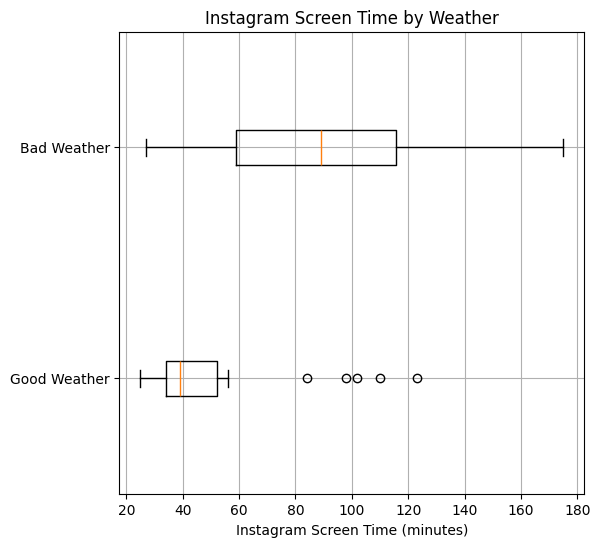

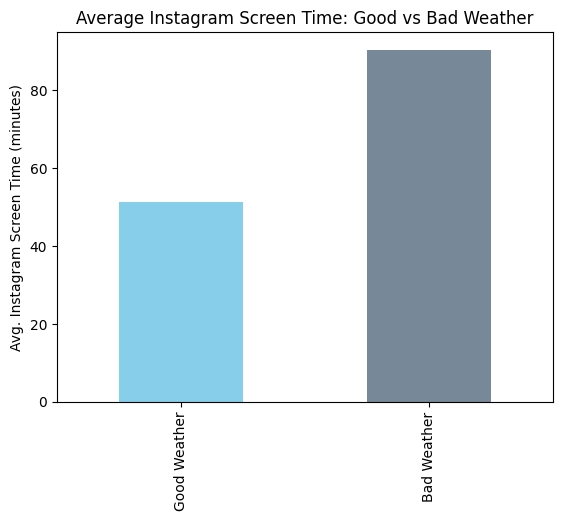


Intercept (β₀): 106.24
Slope (β₁): -3.31



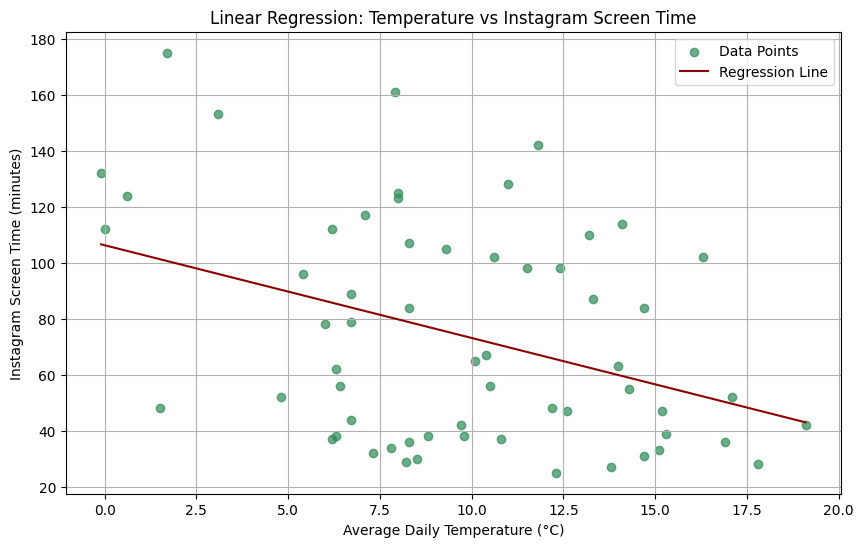


Pearson Correlation Coefficient: 0.49
P-Value: 0.0001
The p-value is less than 0.05. We reject the null hypothesis.
There is a statistically significant relationship between bad weather and my Instagram screen time.

T-statistic: 4.52
P-value: 3.1e-05
We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.

Average Instagram usage for both weather groups:
Bad Weather Days Average: ~ 90.46 minutes
Good Weather Days Average: ~ 51.4 minutes

RMSE: 38.83
MAE: 31.98



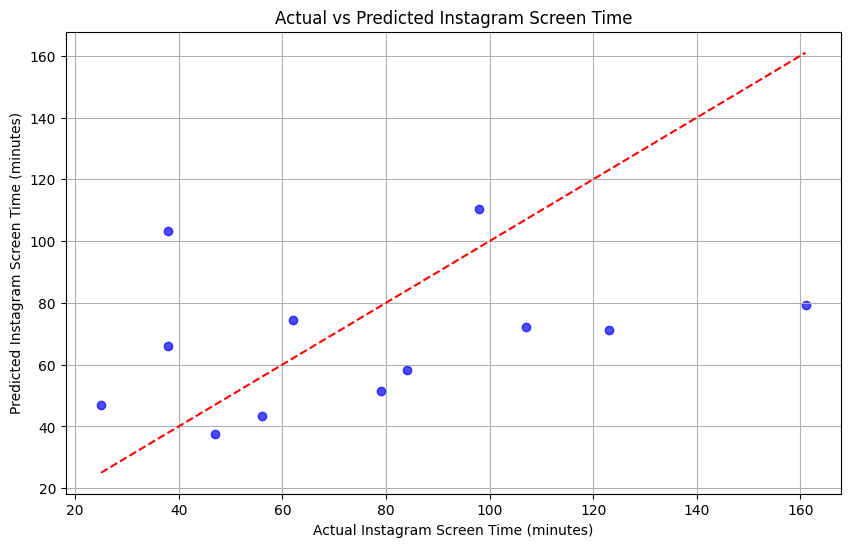

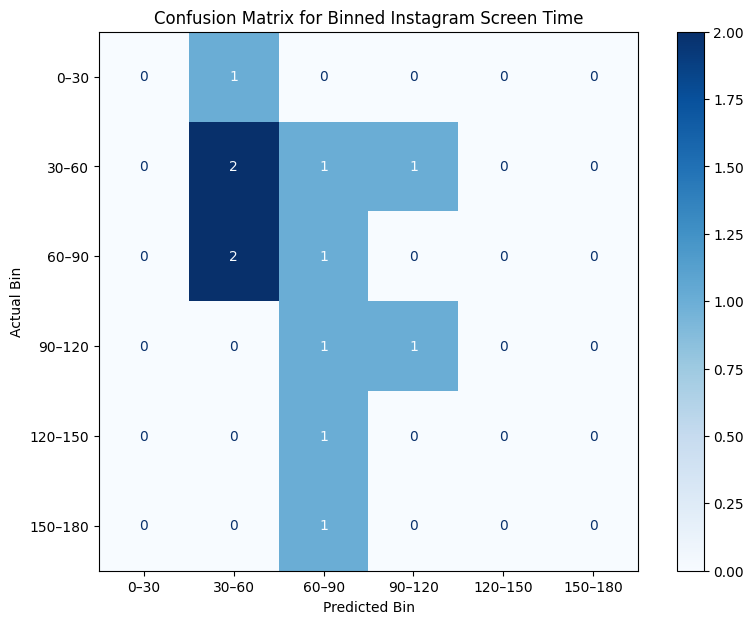

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr


# Reading data
df = pd.read_excel("updated_dsa210data.xlsx")

# Naming columns
df.columns = ['Date', 'Instagram_Time', 'Weather', 'Temperature', 'Humidity']

# Data cleaning
df['Date'] = pd.to_datetime(df['Date'])

print("Missing values:")
print(df.isnull().sum().to_string())
print()

df = df.dropna(subset=['Instagram_Time'])

# Labeling bad weather
bad_weather = ['1', '2', '3', '4']
df['IsBadWeather'] = df['Weather'].isin([1, 2, 3, 4]).astype(int)

# Visualization: Histogram
plt.hist(df['Instagram_Time'], bins=10, color='cadetblue', edgecolor='darkslategrey')
plt.title("Distribution of Instagram Screen Time")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()
print()

# Defining groups for boxplot
bad = df[df['IsBadWeather'] == True]['Instagram_Time']
good = df[df['IsBadWeather'] == False]['Instagram_Time']

# Visualization: Boxplot
fig, ax = plt.subplots(figsize=(6, 6))
ax.boxplot([good, bad],
           vert=False,
           tick_labels=['Good Weather', 'Bad Weather'])
ax.set_xlabel("Instagram Screen Time (minutes)")
ax.set_title("Instagram Screen Time by Weather")
ax.grid(True)
plt.show()
print()

# Visualization: Bar chart
means = df.groupby('IsBadWeather')['Instagram_Time'].mean()
label_map = {0: 'Good Weather', 1: 'Bad Weather'}
color_map = {0: 'skyblue', 1: 'lightslategrey'}

labels = [label_map[i] for i in means.index if i in label_map]
colors = [color_map[i] for i in means.index if i in color_map]

means.index = labels

means.plot(kind='bar', color=colors)
plt.title('Average Instagram Screen Time: Good vs Bad Weather')
plt.ylabel('Avg. Instagram Screen Time (minutes)')
plt.show()
print()

# Linear Regression
df = df.dropna(subset=['Instagram_Time', 'Temperature'])

X = df['Temperature'].values.reshape(-1, 1)
y = df['Instagram_Time'].values

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Slope (β₁): {model.coef_[0]:.2f}")
print()

# Regression Line Plot
x_range = np.linspace(df['Temperature'].min(), df['Temperature'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='seagreen', label='Data Points')
plt.plot(x_range, y_pred, color='darkred', label='Regression Line')
plt.title("Linear Regression: Temperature vs Instagram Screen Time")
plt.xlabel("Average Daily Temperature (°C)")
plt.ylabel("Instagram Screen Time (minutes)")
plt.legend()
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_coefficient, p_value = pearsonr(df['IsBadWeather'].astype(int), df['Instagram_Time'])

print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
    print("There is a statistically significant relationship between bad weather and my Instagram screen time.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")
    print("There is no statistically significant relationship between bad weather and my nstagram screen time.")

# Hypothesis testing
# Null hypothesis (H0): There is no significant difference in Instagram screen time between bad and good weather days.
# Alternative hypothesis (H1): Instagram screen time is significantly higher during bad weather days.
bad = df[df['IsBadWeather'] == True]['Instagram_Time']
good = df[df['IsBadWeather'] == False]['Instagram_Time']

# Independent t-test
t_stat, p_val = ttest_ind(bad, good, equal_var=False)
print("\nT-statistic:", round(t_stat, 2))
print("P-value:", round(p_val, 6))

# Interpreting the result
if p_val < 0.05:
    print("We reject Null Hypothesis. There is a significant increase in Instagram screen time during bad weather days.")
else:
    print("We fail to reject Null Hypothesis. There is no significant difference in Instagram screen time between bad and good weather days.")

# Average Instagram usage for both weather groups
print("\nAverage Instagram usage for both weather groups:")
print("Bad Weather Days Average: ~", round(bad.mean(), 2),"minutes")
print("Good Weather Days Average: ~", round(good.mean(), 2),"minutes")
print()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Preparing data
df['IsBadWeather'] = df['Weather'].isin(['R', 'C', 'SNOWY', 'FOGGY']).astype(int)
df = df.dropna(subset=['Instagram_Time', 'Temperature', 'Humidity'])

X = df[['IsBadWeather', 'Temperature', 'Humidity']]
y = df['Instagram_Time']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print()

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.title("Actual vs Predicted Instagram Screen Time")
plt.xlabel("Actual Instagram Screen Time (minutes)")
plt.ylabel("Predicted Instagram Screen Time (minutes)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.grid(True)
plt.show()
print()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binning screen time values
bins = [0, 30, 60, 90, 120, 150, 180]
labels = ['0–30', '30–60', '60–90', '90–120', '120–150', '150–180']

# Clip values to be within bin range
y_test_clipped = np.clip(y_test, bins[0], bins[-1] - 1)
y_pred_clipped = np.clip(y_pred, bins[0], bins[-1] - 1)

# Convert values to categorical bins
y_test_bins = pd.cut(y_test_clipped, bins=bins, labels=labels)
y_pred_bins = pd.cut(y_pred_clipped, bins=bins, labels=labels)

# Convert categorical bins to numerical codes
y_test_codes = pd.Categorical(y_test_bins, categories=labels).codes
y_pred_codes = pd.Categorical(y_pred_bins, categories=labels).codes

# Compute confusion matrix
cm = confusion_matrix(y_test_codes, y_pred_codes, labels=range(len(labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix for Binned Instagram Screen Time")
plt.xlabel("Predicted Bin")
plt.ylabel("Actual Bin")
plt.grid(False)
plt.show()

